In [3]:
from support_funcs import *
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [9]:
dt = datetime(2020,1,1,22,30,33)

In [10]:
str(dt)

'2020-01-01 22:30:33'

### NP dt array

In [19]:
np.array(['2020-03-16','2020-03-15','2020-01-20'],dtype='datetime64')

array(['2020-03-16', '2020-03-15', '2020-01-20'], dtype='datetime64[D]')

In [27]:
# 300 hour gap
np.arange('2018-06-01','2020-01-02',300,dtype='datetime64[h]')

array(['2018-06-01T00', '2018-06-13T12', '2018-06-26T00', '2018-07-08T12',
       '2018-07-21T00', '2018-08-02T12', '2018-08-15T00', '2018-08-27T12',
       '2018-09-09T00', '2018-09-21T12', '2018-10-04T00', '2018-10-16T12',
       '2018-10-29T00', '2018-11-10T12', '2018-11-23T00', '2018-12-05T12',
       '2018-12-18T00', '2018-12-30T12', '2019-01-12T00', '2019-01-24T12',
       '2019-02-06T00', '2019-02-18T12', '2019-03-03T00', '2019-03-15T12',
       '2019-03-28T00', '2019-04-09T12', '2019-04-22T00', '2019-05-04T12',
       '2019-05-17T00', '2019-05-29T12', '2019-06-11T00', '2019-06-23T12',
       '2019-07-06T00', '2019-07-18T12', '2019-07-31T00', '2019-08-12T12',
       '2019-08-25T00', '2019-09-06T12', '2019-09-19T00', '2019-10-01T12',
       '2019-10-14T00', '2019-10-26T12', '2019-11-08T00', '2019-11-20T12',
       '2019-12-03T00', '2019-12-15T12', '2019-12-28T00'],
      dtype='datetime64[h]')

In [28]:
pd.date_range('2020-01-01',periods=7,freq='')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [29]:
pd.to_datetime(['1/2/2018','Jan 03, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [38]:
df = get_yield_curves()

In [39]:
df['date'] = pd.to_datetime(df['date'])

In [40]:
# set date index
df.index = df['date']

In [45]:
print(df.index.max(),df.index.min())
print(df.index.argmax(), df.index.argmin())

2020-05-11 00:00:00 1954-07-01 00:00:00
24056 0


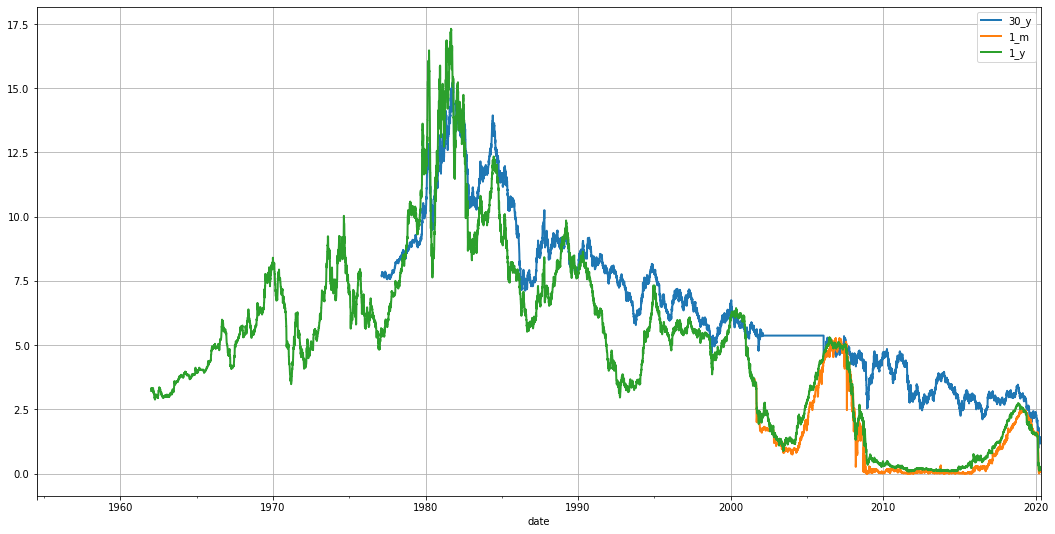

In [41]:
df.plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);

## Time Resampling

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>

<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

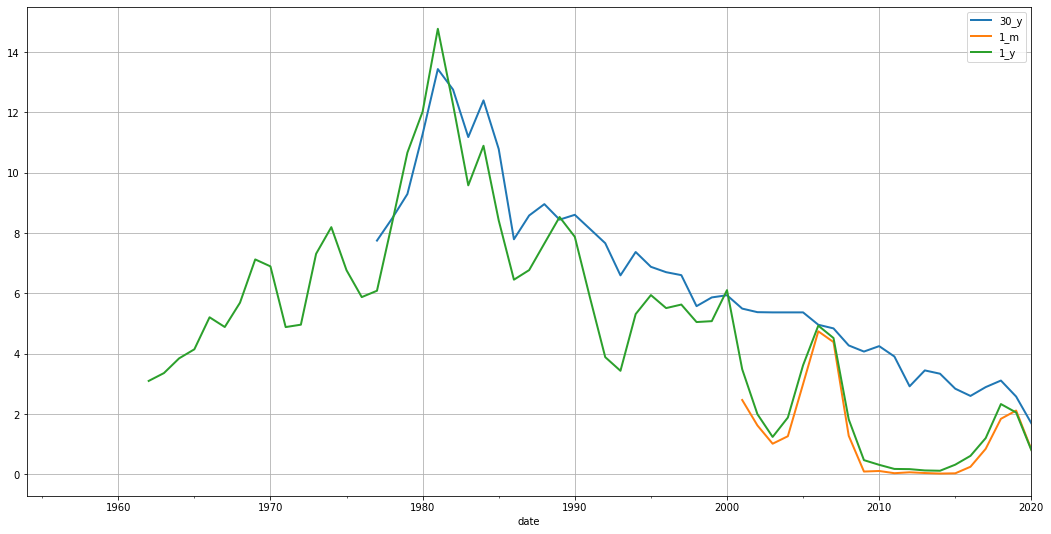

In [52]:
# daily to yearly
df.resample(rule='A').mean().plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);

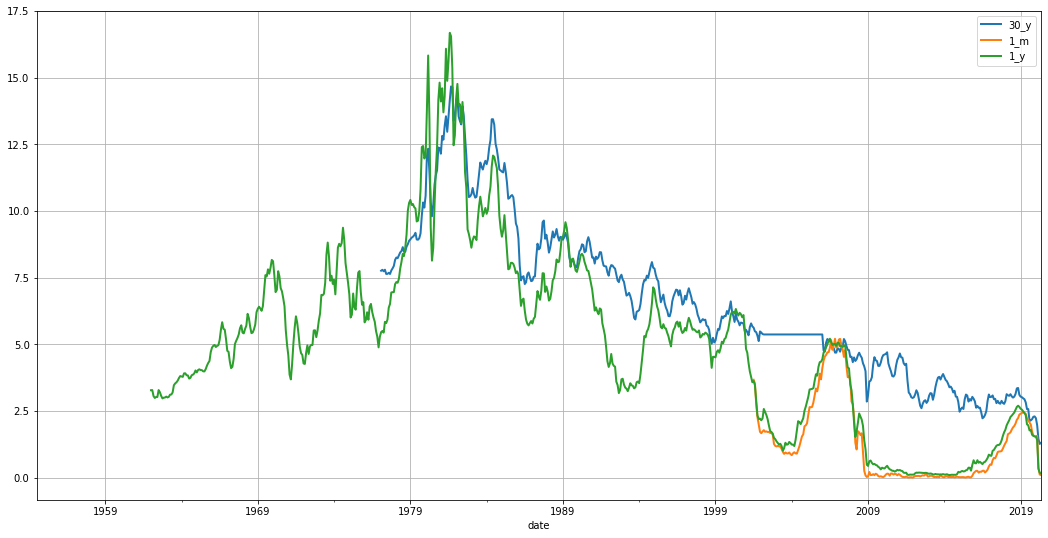

In [53]:
# daily to month
df.resample(rule='M').mean().plot.line(y=['30_y','1_m','1_y'],figsize=(18,9),lw=2,grid=True);